In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


In [ ]:
(X_train,y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape,"**************",X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), '**************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

In [ ]:
y_train[0]

9

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

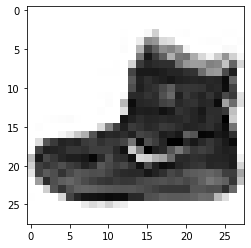

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

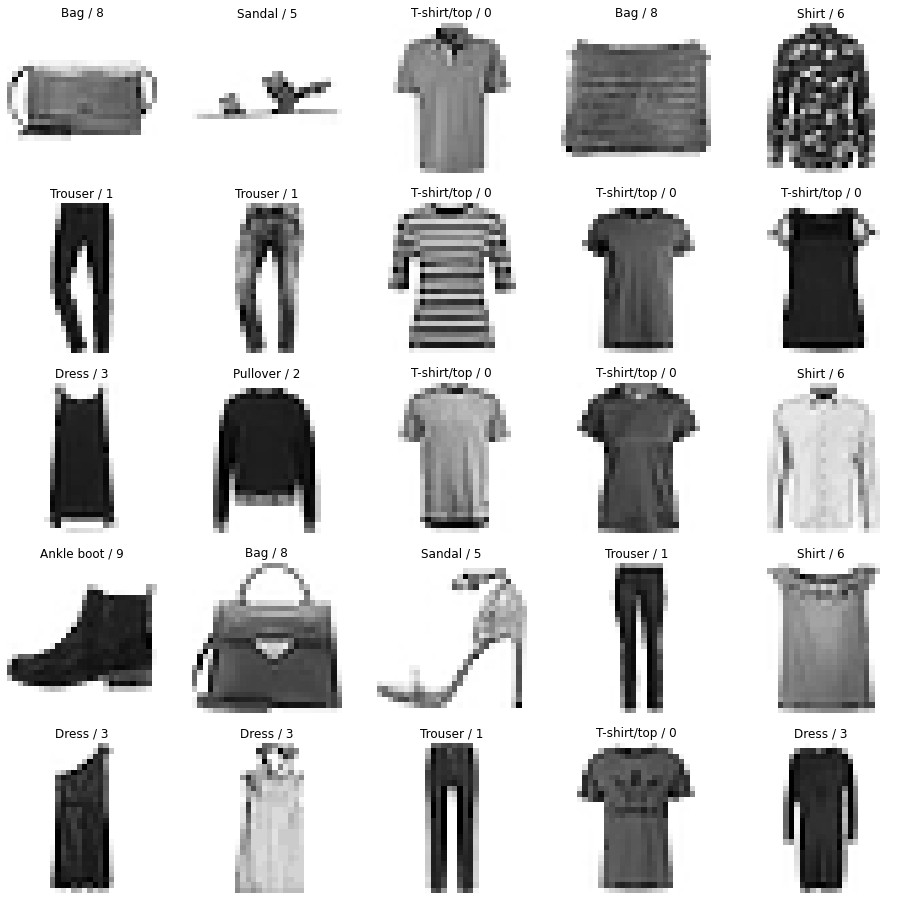

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))
  

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

5

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_train = X_train/255
X_test= X_test/255

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((30720, 28, 28, 1, 1), (7680, 28, 28, 1, 1), (30720,), (7680,))

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
60/60 [==============================] - 13s 210ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 2/10
60/60 [==============================] - 13s 210ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 3/10
60/60 [==============================] - 14s 233ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 4/10
60/60 [==============================] - 13s 212ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 5/10
60/60 [==============================] - 13s 210ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 6/10
60/60 [==============================] - 13s 210ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 7/10
60/60 [==============================] - 13s 210ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.0982